![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [19]:
# Start coding here
# Use as many cells as you need
import pandas as pd

# Load the CSV into a DataFrame
sleep_data = pd.read_csv("sleep_health_data.csv")

# Preview the first few rows
print(sleep_data.head())


   Person ID Gender  Age  ... Heart Rate  Daily Steps  Sleep Disorder
0          1   Male   27  ...         77         4200            None
1          2   Male   28  ...         75        10000            None
2          3   Male   28  ...         75        10000            None
3          4   Male   28  ...         85         3000     Sleep Apnea
4          5   Male   28  ...         85         3000     Sleep Apnea

[5 rows x 13 columns]


In [20]:
sleep_data.columns = sleep_data.columns.str.replace(" ", "_").str.lower()

In [21]:
print(sleep_data.info())
print(sleep_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   person_id                374 non-null    int64  
 1   gender                   374 non-null    object 
 2   age                      374 non-null    int64  
 3   occupation               374 non-null    object 
 4   sleep_duration           374 non-null    float64
 5   quality_of_sleep         374 non-null    int64  
 6   physical_activity_level  374 non-null    int64  
 7   stress_level             374 non-null    int64  
 8   bmi_category             374 non-null    object 
 9   blood_pressure           374 non-null    object 
 10  heart_rate               374 non-null    int64  
 11  daily_steps              374 non-null    int64  
 12  sleep_disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None
person_id        

In [22]:
print(sleep_data.columns.tolist())

['person_id', 'gender', 'age', 'occupation', 'sleep_duration', 'quality_of_sleep', 'physical_activity_level', 'stress_level', 'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps', 'sleep_disorder']


In [23]:
lowest_sleep_occ = sleep_data.groupby("occupation")["sleep_duration"].mean().idxmin()


In [24]:
lowest_sleep_quality_occ = sleep_data.groupby("occupation")["quality_of_sleep"].mean().idxmin()

In [25]:
same_occ = lowest_sleep_occ == lowest_sleep_quality_occ

In [26]:
bmi_insomnia_ratios = {}

for category, group in sleep_data.groupby("bmi_category"):
    insomnia_ratio = (group["sleep_disorder"] == "Insomnia").mean()
    bmi_insomnia_ratios[category] = round(insomnia_ratio, 2)


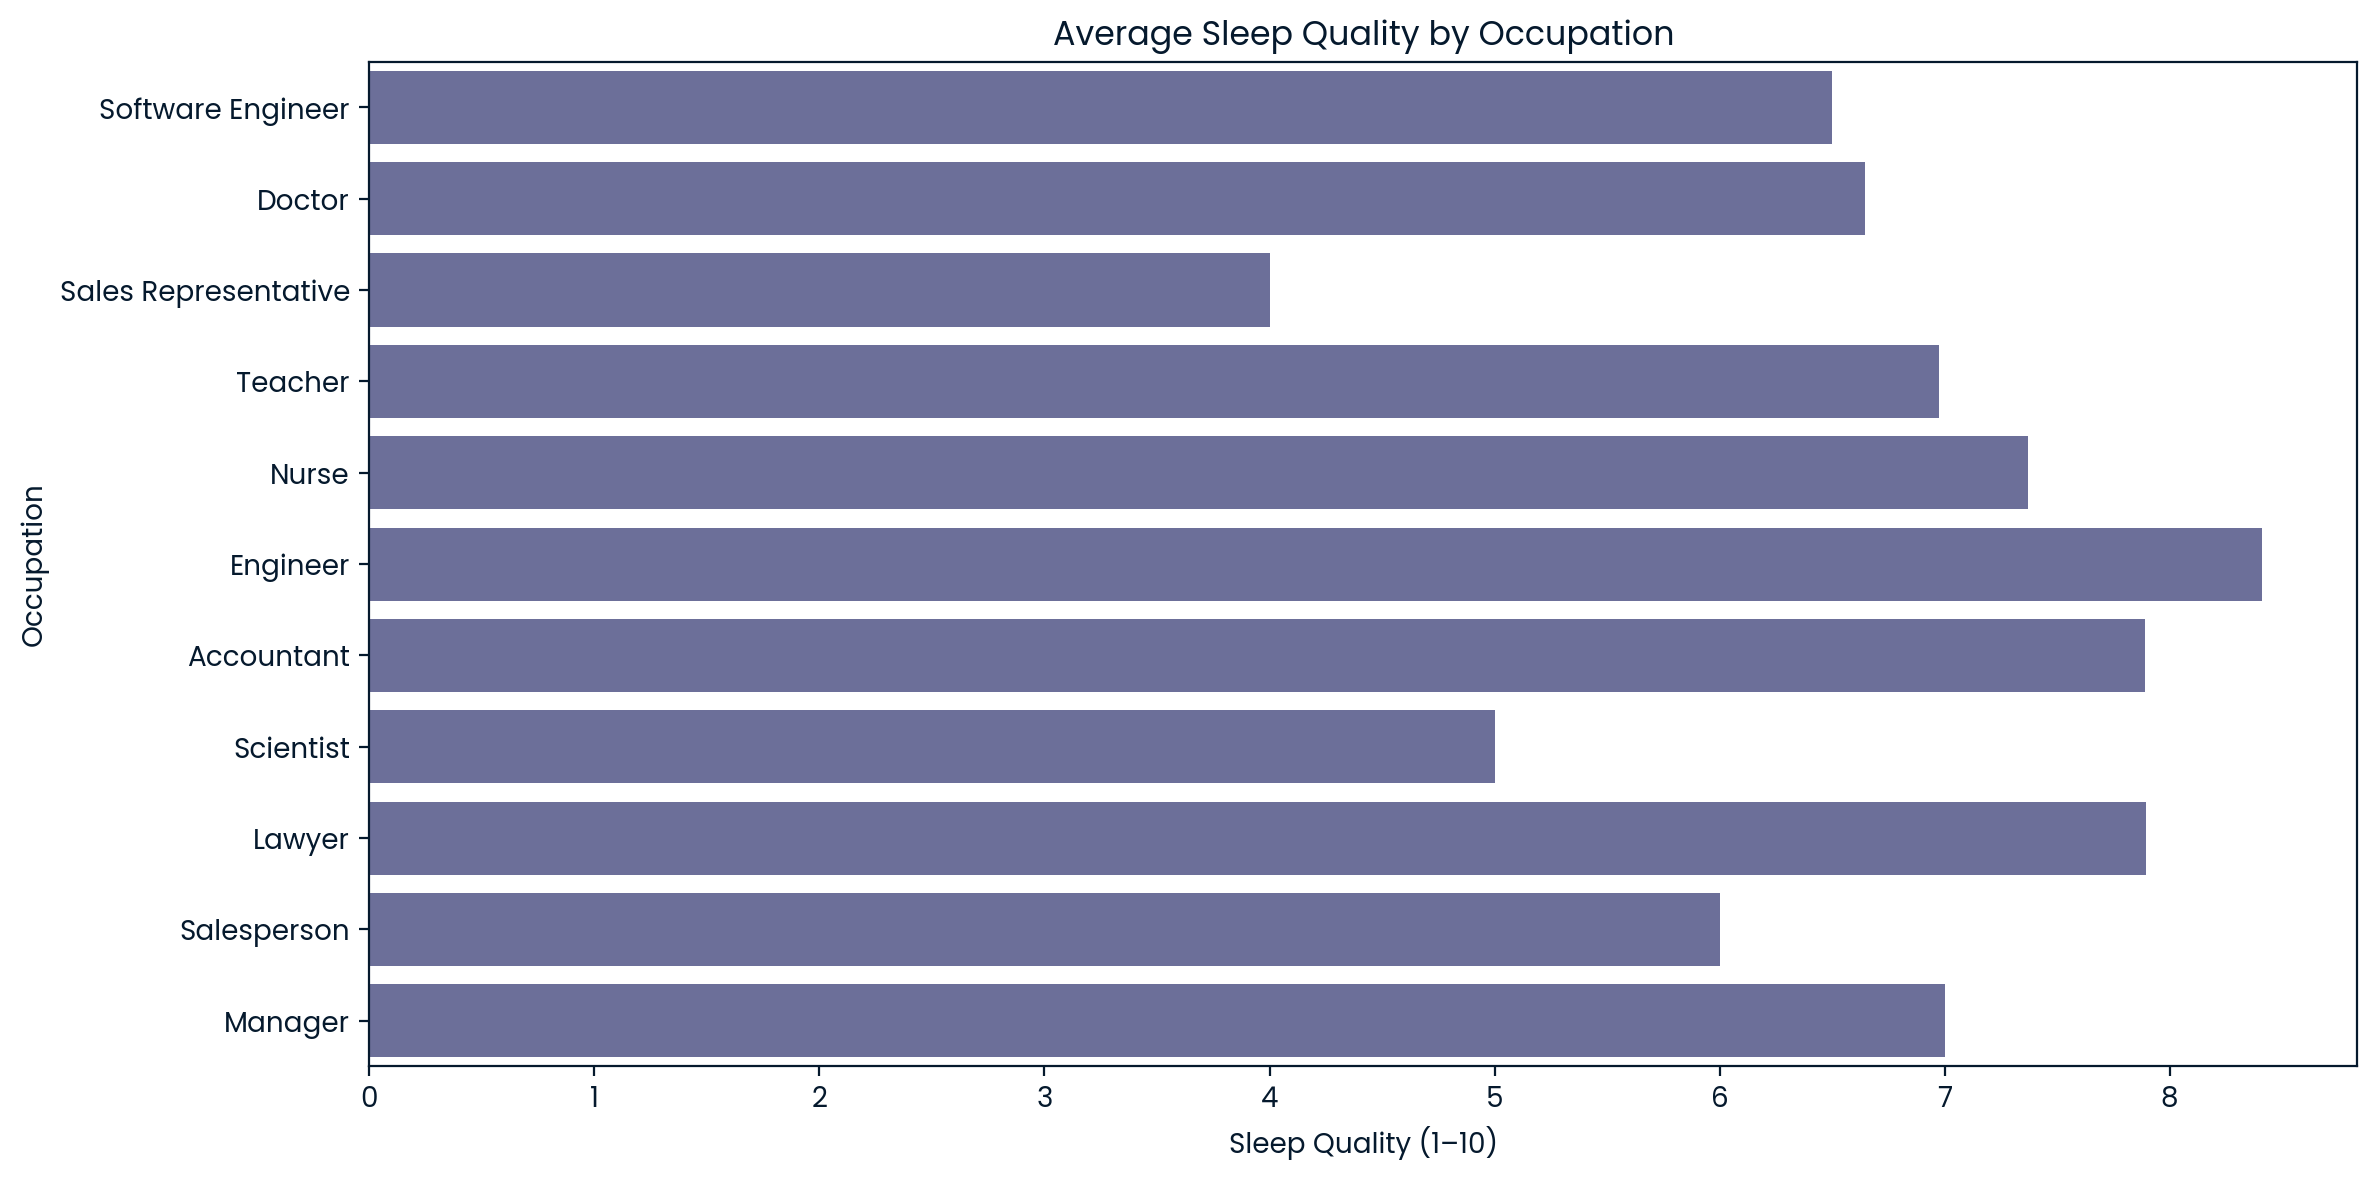

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=sleep_data, x="quality_of_sleep", y="occupation", ci=None)
plt.title("Average Sleep Quality by Occupation")
plt.xlabel("Sleep Quality (1–10)")
plt.ylabel("Occupation")
plt.tight_layout()
plt.show()


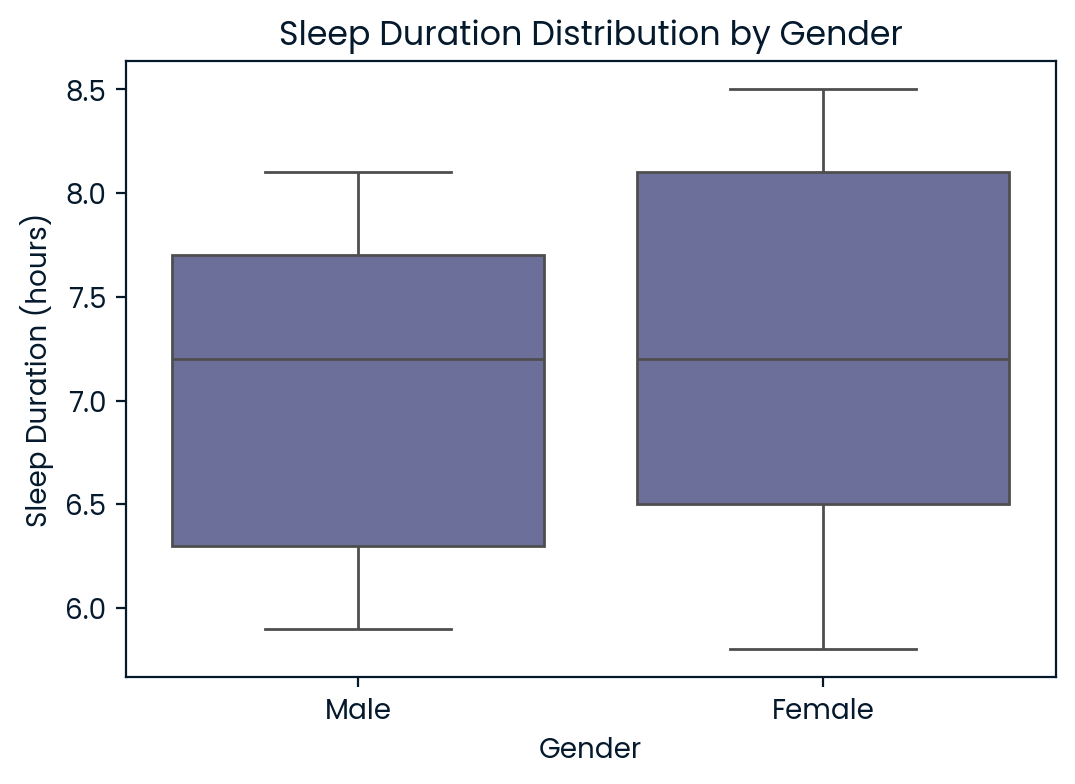

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=sleep_data, x="gender", y="sleep_duration")
plt.title("Sleep Duration Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Sleep Duration (hours)")
plt.show()


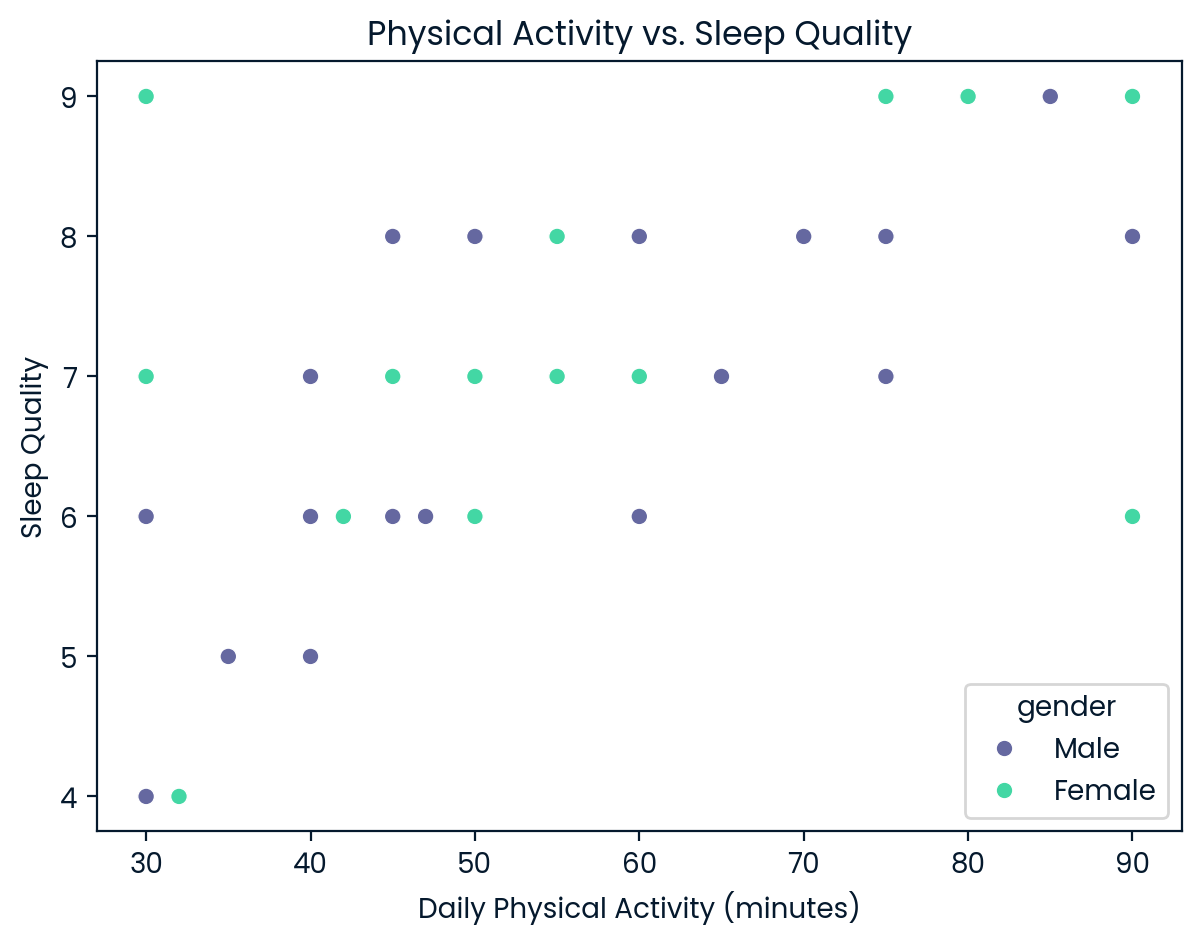

In [29]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=sleep_data, x="physical_activity_level", y="quality_of_sleep", hue="gender")
plt.title("Physical Activity vs. Sleep Quality")
plt.xlabel("Daily Physical Activity (minutes)")
plt.ylabel("Sleep Quality")
plt.show()


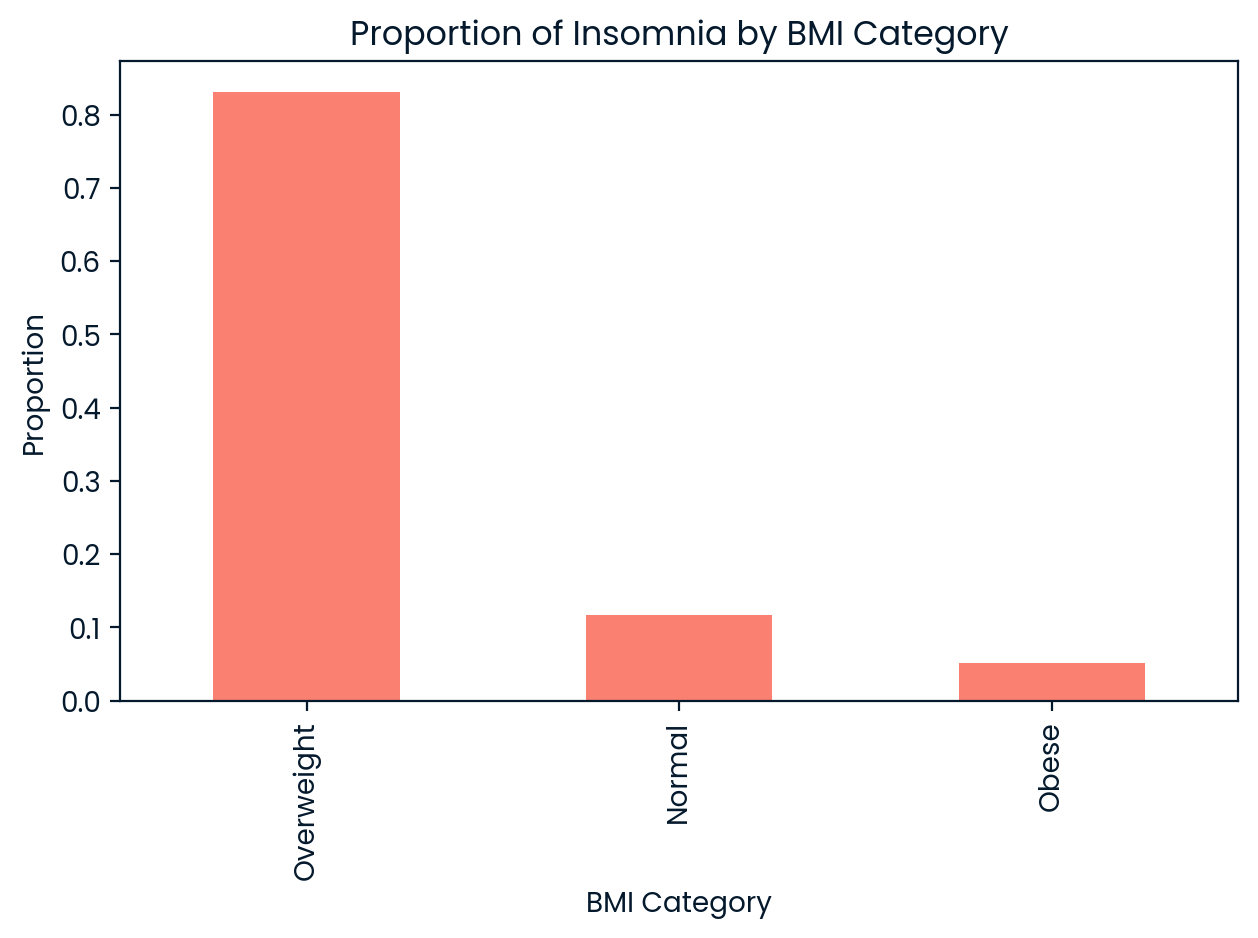

In [31]:
insomnia_by_bmi = sleep_data[sleep_data["sleep_disorder"] == "Insomnia"]["bmi_category"].value_counts(normalize=True)

insomnia_by_bmi.plot(kind="bar", color="salmon", title="Proportion of Insomnia by BMI Category")
plt.ylabel("Proportion")
plt.xlabel("BMI Category")
plt.tight_layout()
plt.show()
